Evaluation Metrics:
Accuracy:  1.00
Precision: 1.00
Recall:    1.00

Classification Report:
                 precision    recall  f1-score   support

 Low Watch Time       1.00      1.00      1.00        11
High Watch Time       1.00      1.00      1.00         9

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



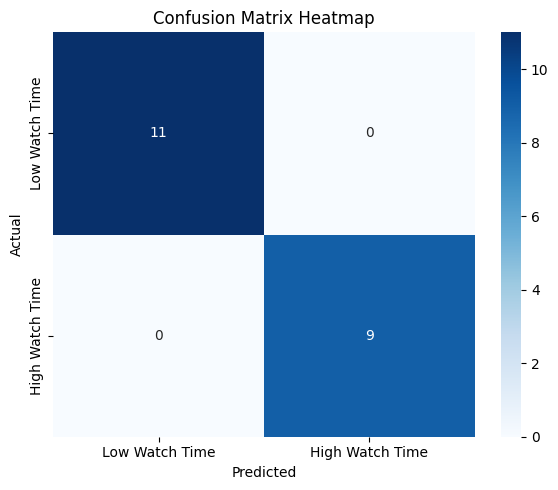

In [12]:
#Movie Watch Pattern Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Sample data: Simulating movie-watching behavior
np.random.seed(42)
data = {
    'time_watched': np.random.randint(30, 180, 100),  # Minutes watched
    'genre_preference': np.random.choice(['Action', 'Comedy', 'Drama', 'Horror', 'Romance'], 100),
    'average_rating': np.random.uniform(1, 5, 100),  # Ratings from 1 to 5
}

df = pd.DataFrame(data)

# Convert categorical data (genre preference) into numerical using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['genre_preference'], drop_first=True)

# Features and Target
X = df_encoded.drop(columns=['average_rating'])
y = (df['time_watched'] > 120).astype(int)  # Binary classification: Will the user watch more than 120 minutes?

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Watch Time', 'High Watch Time']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Watch Time', 'High Watch Time'],
            yticklabels=['Low Watch Time', 'High Watch Time'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
